 Take the diabetes data set (which is the sklearn datasets system), run

                -a PCA,  produce the scoreplot,  and bargraphs of the first 2 PC axes.    Do a false color plot coding using the diabetes progression on the PC plot.  You could bin the disease progress into 5 categories, or use a continuous false color coding

                -a Kmeans (find the optimal k),  produce a false color coding of the disease progression

                -a t-SNE dimension reduction, with the associated plots

Turn in a pdf

In [4]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time
import pickle, gzip

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from numpy.testing import assert_array_almost_equal
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score




In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [13]:
dir(diabetes)
diabetesDf = pd.DataFrame(diabetes.data,columns = diabetes.feature_names)
y = diabetes.target

In [14]:
diabetesDf

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [28]:
from sklearn.decomposition import PCA

n_components = 10
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetesDf, y, test_size=0.2, random_state=0)

In [30]:
train_index = range(0,len(X_train))
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=train_index)

In [32]:
sum(pca.explained_variance_ratio_)

1.0

In [34]:
importanceOfPrincipalComponents = \
    pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

In [36]:
importanceOfPrincipalComponents

,0,1,2,3,4,5,6,7,8,9
0,0.415379,0.140226,0.115423,0.095579,0.064544,0.06302,0.054229,0.043179,0.00751,0.00091


In [41]:
X_train_PCA

,0,1,2,3,4,5,6,7,8,9
0,0.041048,-0.011153,0.077325,-0.034156,0.076028,0.019647,-0.014447,0.001048,-0.017520,-0.000400
1,-0.183896,0.050601,-0.009780,0.044820,0.070035,-0.028567,0.020694,0.034464,-0.005786,-0.000681
2,-0.010798,0.020048,0.006812,-0.068958,-0.028723,0.027031,0.036267,0.012706,-0.004454,-0.001824
3,-0.100152,-0.015372,-0.030421,-0.047698,-0.028349,0.039338,-0.012827,-0.085211,0.006441,0.000918
4,0.049482,-0.005845,0.025998,-0.050614,-0.027744,0.004573,-0.019407,-0.038135,-0.014248,-0.000440
...,...,...,...,...,...,...,...,...,...,...
348,0.185471,0.027516,0.010233,-0.024104,-0.001121,-0.068855,0.076534,-0.016926,0.031079,0.016968
349,-0.029156,-0.035415,0.035077,-0.087900,-0.035581,0.035069,0.014590,-0.019320,-0.016599,0.002455
350,0.168519,-0.011343,0.054443,0.027164,0.032211,-0.092482,0.017135,0.082031,0.002325,0.000720
351,-0.162101,0.049845,-0.069329,0.032401,-0.016888,-0.028067,0.051305,0.014730,-0.014892,-0.002408


In [42]:
X_train_PCA.loc[:,0:1]

,0,1
0,0.041048,-0.011153
1,-0.183896,0.050601
2,-0.010798,0.020048
3,-0.100152,-0.015372
4,0.049482,-0.005845
...,...,...
348,0.185471,0.027516
349,-0.029156,-0.035415
350,0.168519,-0.011343
351,-0.162101,0.049845


In [50]:
 y_train=pd.Series(y_train)

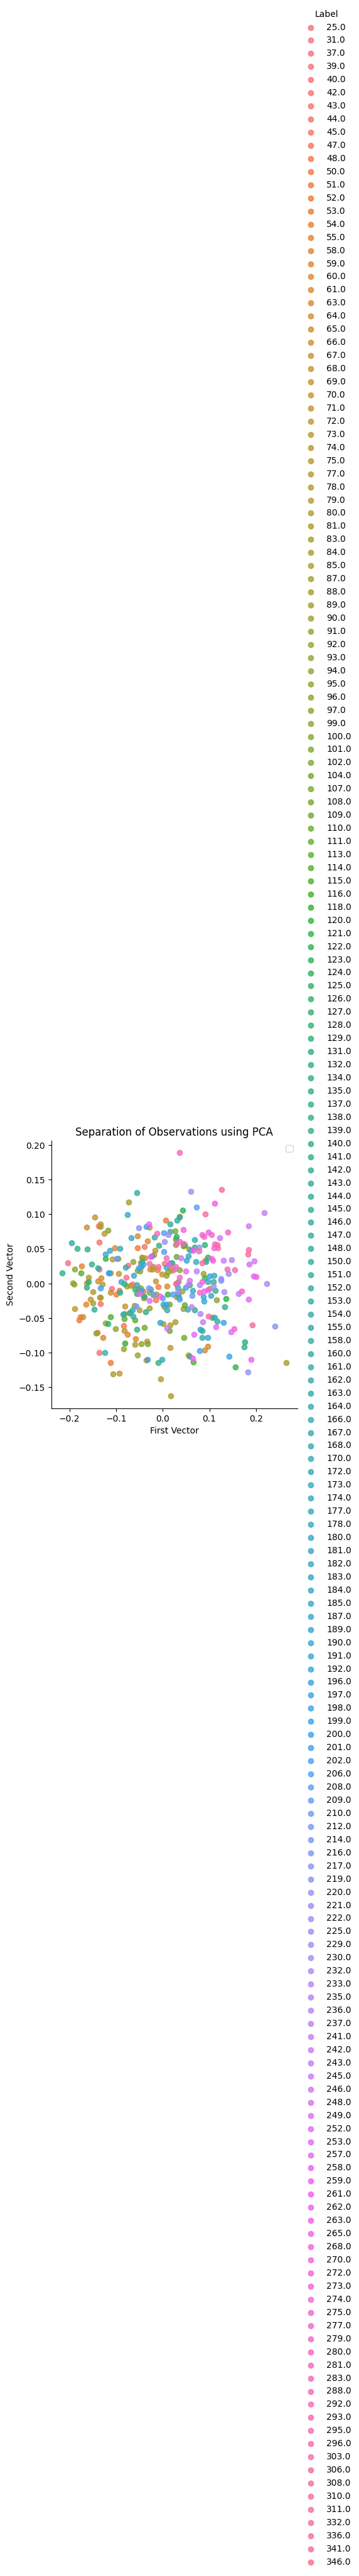

In [56]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)
    plt.legend([])

scatterPlot(X_train_PCA, y_train, "PCA")

In [59]:
feature_names = diabetesDf.columns

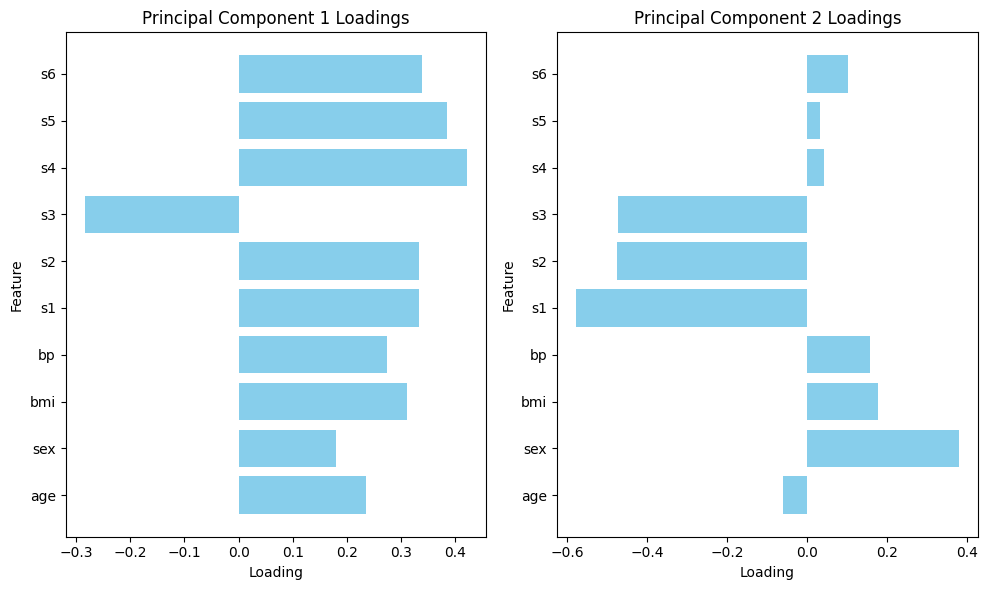

In [60]:
loadings = pca.components_[:2, :]

# Step 4: Plot bar graphs
plt.figure(figsize=(10, 6))

for i, pc in enumerate(loadings):
    plt.subplot(1, 2, i+1)
    plt.barh(range(len(feature_names)), pc, align='center', color='skyblue')
    plt.yticks(range(len(feature_names)), feature_names)
    plt.xlabel('Loading')
    plt.ylabel('Feature')
    plt.title('Principal Component ' + str(i+1) + ' Loadings')

plt.tight_layout()
plt.show()

In [63]:
X_train_PCA

,0,1,2,3,4,5,6,7,8,9
0,0.041048,-0.011153,0.077325,-0.034156,0.076028,0.019647,-0.014447,0.001048,-0.017520,-0.000400
1,-0.183896,0.050601,-0.009780,0.044820,0.070035,-0.028567,0.020694,0.034464,-0.005786,-0.000681
2,-0.010798,0.020048,0.006812,-0.068958,-0.028723,0.027031,0.036267,0.012706,-0.004454,-0.001824
3,-0.100152,-0.015372,-0.030421,-0.047698,-0.028349,0.039338,-0.012827,-0.085211,0.006441,0.000918
4,0.049482,-0.005845,0.025998,-0.050614,-0.027744,0.004573,-0.019407,-0.038135,-0.014248,-0.000440
...,...,...,...,...,...,...,...,...,...,...
348,0.185471,0.027516,0.010233,-0.024104,-0.001121,-0.068855,0.076534,-0.016926,0.031079,0.016968
349,-0.029156,-0.035415,0.035077,-0.087900,-0.035581,0.035069,0.014590,-0.019320,-0.016599,0.002455
350,0.168519,-0.011343,0.054443,0.027164,0.032211,-0.092482,0.017135,0.082031,0.002325,0.000720
351,-0.162101,0.049845,-0.069329,0.032401,-0.016888,-0.028067,0.051305,0.014730,-0.014892,-0.002408


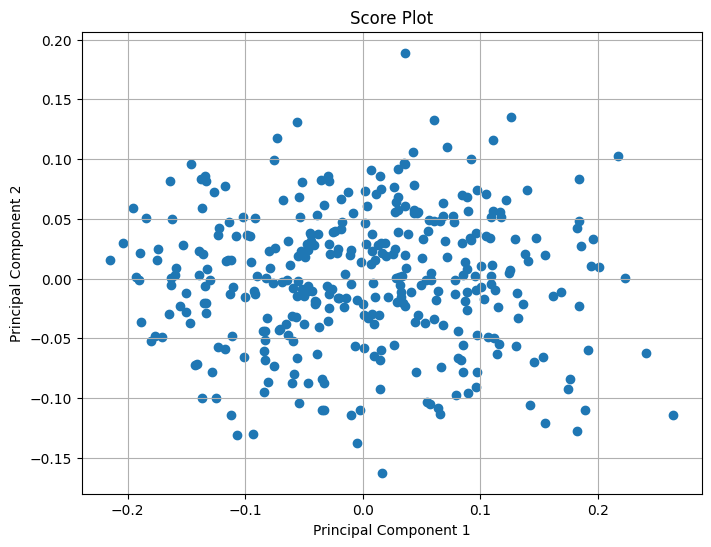

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_PCA.iloc[:, 0], X_train_PCA.iloc[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Score Plot')
plt.grid(True)
plt.show()

 -a Kmeans (find the optimal k),  produce a false color coding of the disease progression

In [68]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [76]:
kmeans


KMeans(n_clusters=2, random_state=42)

In [79]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(n_clusters=[100,200,300])
grid_clf = GridSearchCV(kmeans, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .....................................n_clusters=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .....................................n_clusters=100; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .....................................n_clusters=100; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .....................................n_clusters=200; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .....................................n_clusters=200; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .....................................n_clusters=200; total time=   0.4s
[CV] END .....................................n_clusters=300; total time=   0.0s
[CV] END .....................................n_clusters=300; total time=   0.0s
[CV] END .....................................n_clusters=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py", line 1426, in fit
    self._check_params_vs_input(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py", line 1362, in _check_params_vs_input
    super()._check_params_vs_input(X, default_n_init=10)
  File "/usr/local

GridSearchCV(cv=3, estimator=KMeans(n_clusters=2, random_state=42),
             param_grid={'n_clusters': [100, 200, 300]}, verbose=2)

In [80]:
grid_clf.best_params_


{'n_clusters': 200}

In [81]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=200, random_state=42)
kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=200, random_state=42)

In [82]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[-0.00369829,  0.05068012, -0.00351142, ...,  0.05275942,
         0.01216378,  0.02170389],
       [-0.09360361, -0.04464164, -0.04312102, ..., -0.03949338,
        -0.00892289, -0.06113825],
       [ 0.00538306,  0.05068012, -0.01105611, ..., -0.02104282,
        -0.00884312,  0.05484075],
       ...,
       [-0.00551455,  0.05068012, -0.00836158, ..., -0.00259226,
         0.08059005,  0.00720652],
       [ 0.00538306,  0.05068012,  0.03043966, ..., -0.03949338,
         0.0086406 ,  0.01549073],
       [ 0.11072668,  0.05068012,  0.00672779, ...,  0.03430886,
         0.00200444,  0.07762233]])

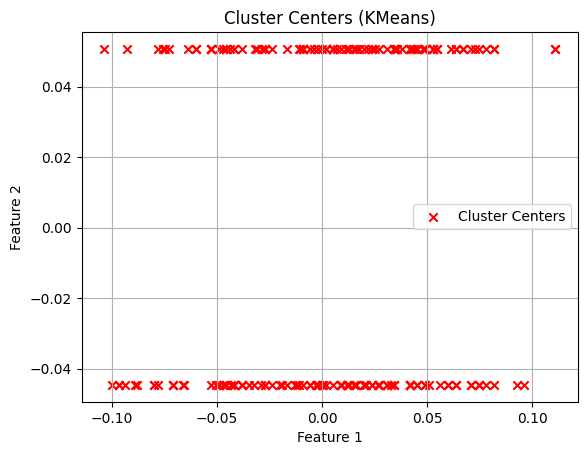

In [83]:
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', c='r', label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Centers (KMeans)')
plt.legend()
plt.grid(True)
plt.show()

-a t-SNE dimension reduction, with the associated plots

In [86]:
X_train_PCA


,0,1,2,3,4,5,6,7,8,9
0,0.041048,-0.011153,0.077325,-0.034156,0.076028,0.019647,-0.014447,0.001048,-0.017520,-0.000400
1,-0.183896,0.050601,-0.009780,0.044820,0.070035,-0.028567,0.020694,0.034464,-0.005786,-0.000681
2,-0.010798,0.020048,0.006812,-0.068958,-0.028723,0.027031,0.036267,0.012706,-0.004454,-0.001824
3,-0.100152,-0.015372,-0.030421,-0.047698,-0.028349,0.039338,-0.012827,-0.085211,0.006441,0.000918
4,0.049482,-0.005845,0.025998,-0.050614,-0.027744,0.004573,-0.019407,-0.038135,-0.014248,-0.000440
...,...,...,...,...,...,...,...,...,...,...
348,0.185471,0.027516,0.010233,-0.024104,-0.001121,-0.068855,0.076534,-0.016926,0.031079,0.016968
349,-0.029156,-0.035415,0.035077,-0.087900,-0.035581,0.035069,0.014590,-0.019320,-0.016599,0.002455
350,0.168519,-0.011343,0.054443,0.027164,0.032211,-0.092482,0.017135,0.082031,0.002325,0.000720
351,-0.162101,0.049845,-0.069329,0.032401,-0.016888,-0.028067,0.051305,0.014730,-0.014892,-0.002408


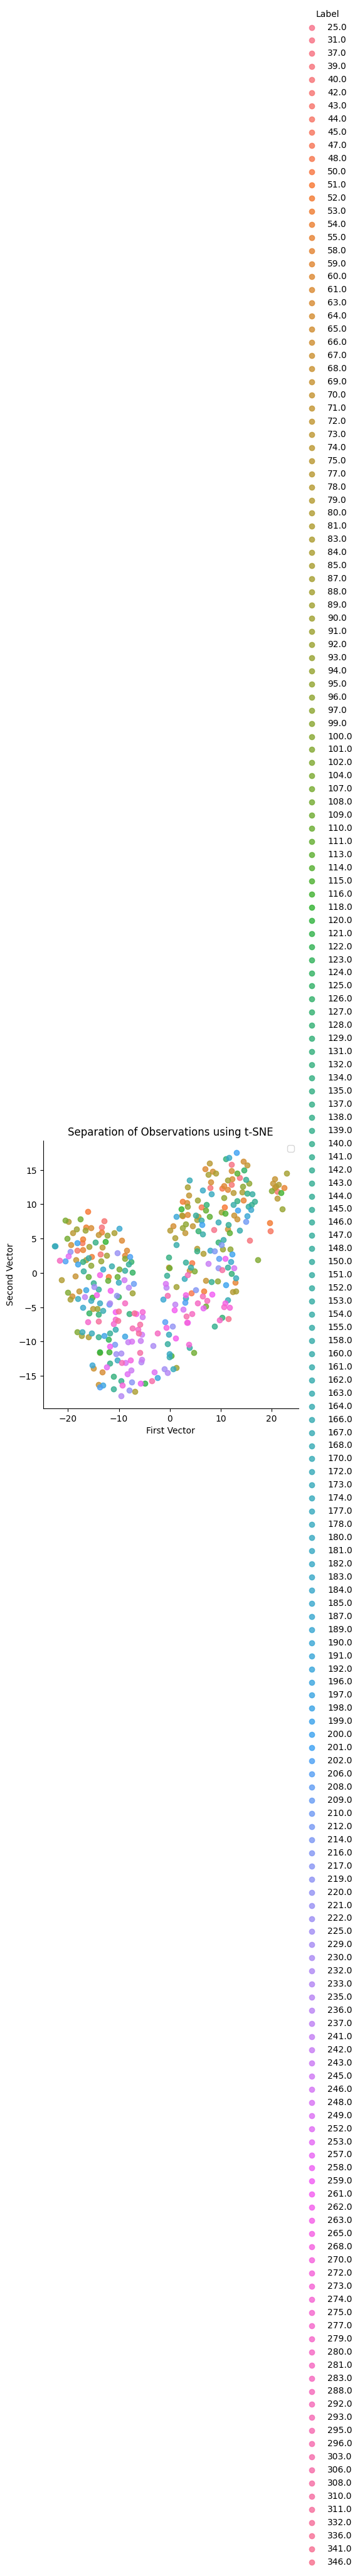

In [87]:
from sklearn.manifold import TSNE

n_components = 2
learning_rate = 300
perplexity = 30
early_exaggeration = 12
init = 'random'
random_state = 2018

tSNE = TSNE(n_components=n_components, learning_rate=learning_rate, \
            perplexity=perplexity, early_exaggeration=early_exaggeration, \
            init=init, random_state=random_state)

X_train_tSNE = tSNE.fit_transform(X_train_PCA)
X_train_tSNE = pd.DataFrame(data=X_train_tSNE, index=train_index[:5001])

scatterPlot(X_train_tSNE, y_train, "t-SNE")